In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/RAJAT/Desktop/Projects/titanic1.csv')
data.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# dropping stupid features, Irrelevant features
columns_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked']


data_clean= data.drop(columns_to_drop,axis=1)
data_clean.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
#Features= Pclass,Sex,Age,SibSp,Parch,Fare
#label = Survived

In [5]:
#changing Sex in numericals as our algorithm doesnt accept words using label encoder class
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean["Sex"]= le.fit_transform(data_clean["Sex"])
data_clean.head(n=5)
data_clean.info() # gives us all the info about our data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [6]:
#through data info we  got to know there are some  missing values in Age, so we refill the whol column by taking mean
data_clean= data_clean.fillna(data_clean['Age'].mean()) #fixed
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [7]:
#Featured and labels
# Features
input_cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
# label
output_cols= ['Survived']

X=data_clean[input_cols]
Y=data_clean[output_cols]

In [8]:
#Algorithm
#Entropy
def entropy(col): #there are 6 columns through which we will pick one column and commute it
    counts= np.unique(col,return_counts=True)# will convert the column into numpy array. 
    N=float(col.shape[0]) #total number of entries in that column
    entropy= 0.0
    for i in counts[1]: 
        p=i/N
        entropy +=(-1.0*p*np.log2(p))
    return entropy



In [9]:
col=np.array([1,1,0,0])
print(entropy(col ), " Maximum Entropy")
col2=np.array([1,1,1])
print(entropy(col2), " Minimum Entropy")

1.0  Maximum Entropy
0.0  Minimum Entropy


In [10]:
#Divide data
def divide_data(x_data,fkey,fval):
    #Work with Pandas Data Frames
    x_right = pd.DataFrame([],columns=x_data.columns) #Defining column
    x_left = pd.DataFrame([],columns=x_data.columns) #defining column 
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix] #in sex column
        #condition
        if val > fval: 
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

In [11]:
x_left,x_right = divide_data(data_clean[:10],'Sex',0.5)
print("Male",x_left)
print("Female",x_right)

Male    Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
Female    Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [12]:
def information_gain(x_data,fkey,fval):
    
    left,right = divide_data(x_data,fkey,fval) #devide the data in left and right
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0] #no. of examples in left / total number
    r = float(right.shape[0])/x_data.shape[0] #no. of examples in right/ total number
    
    #All examples come to one side!
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 #Min Information Gain
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain



In [13]:
#calculates information gain for each column
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [14]:
# as a result, sex has the maximum information gain, which means it shows maximum acuuracy so sex is the best feature.

#but we wont be checking that again and again so we make a class that checks everthng
class DecisionTree:
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
        

In [15]:
d= DecisionTree()
d.train(data_clean)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Feat

In [16]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [17]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [18]:
dt = DecisionTree()

In [19]:
dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [20]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [21]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [22]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [23]:
y_actual = test_data[output_cols]
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

print(y_pred)
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]
print(acc)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]
(268, 1)
0.8171641791044776


In [24]:
#Decision Tree using Scikit Learn
from sklearn.tree import DecisionTreeClassifier 


In [25]:
sk_tree= DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [26]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [28]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

In [29]:
#Visualization 
import pydotplus

In [30]:
from sklearn.externals.six import StringIO

In [31]:
from IPython.display import Image

In [32]:
from sklearn.tree import export_graphviz

In [33]:
dot_data= StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

In [34]:
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

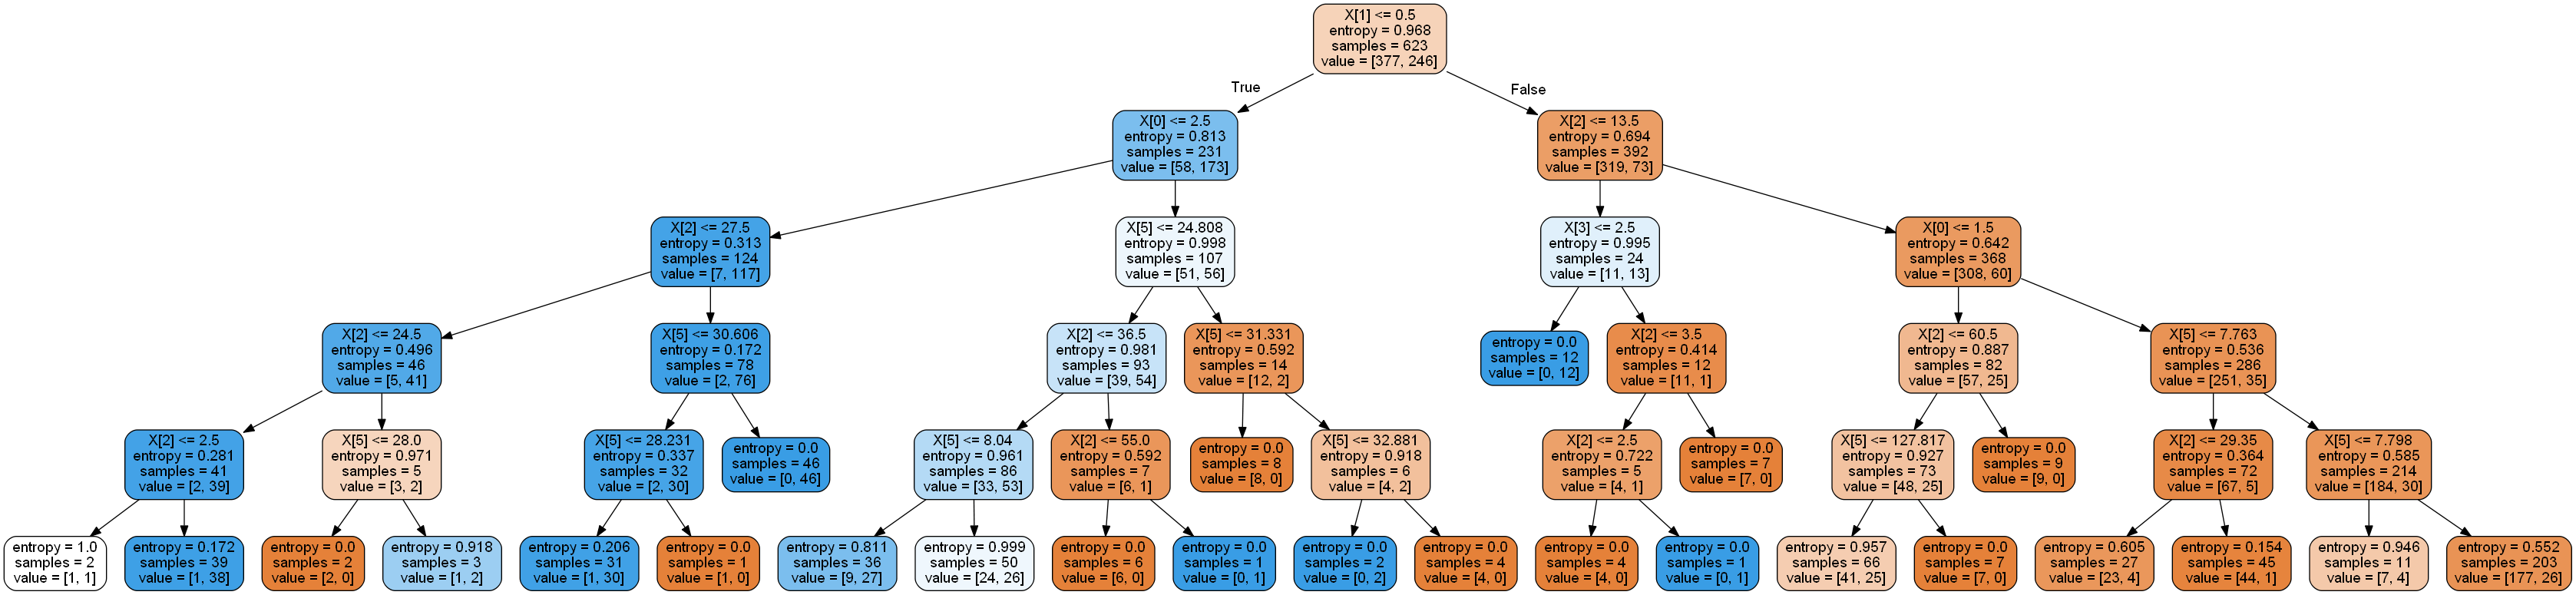

In [35]:
Image(graph.create_png())

In [36]:
#RANDOM FOREST

In [37]:

X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))


In [38]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [39]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [42]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rf.score(X_train,Y_train)

0.8507223113964687

In [44]:
rf.score(X_test,Y_test)

0.8134328358208955